In [1]:
import findspark
findspark.init('/home/ubuntu/spark-3.2.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('basics').getOrCreate()

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/10/14 02:53:48 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
# Reads schema and accepts that the data has a header.
df = spark.read.csv('Datasets/Violence Against Women  Girls Data.csv', inferSchema=True, header=True)

# Let's see the data.
df.show()

# And the data schema.
df.printSchema()

+--------+-----------+------+---------------------+---------------------+--------------------+-----------+-----+
|RecordID|    Country|Gender|Demographics Question|Demographics Response|            Question|Survey Year|Value|
+--------+-----------+------+---------------------+---------------------+--------------------+-----------+-----+
|       1|Afghanistan|     F|       Marital status|        Never married|... if she burns ...| 01/01/2015| null|
|       1|Afghanistan|     F|            Education|               Higher|... if she burns ...| 01/01/2015| 10.1|
|       1|Afghanistan|     F|            Education|            Secondary|... if she burns ...| 01/01/2015| 13.7|
|       1|Afghanistan|     F|            Education|              Primary|... if she burns ...| 01/01/2015| 13.8|
|       1|Afghanistan|     F|       Marital status| Widowed, divorced...|... if she burns ...| 01/01/2015| 13.8|
|       1|Afghanistan|     F|           Employment|    Employed for kind|... if she burns ...| 0

In [5]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import count, mean, stddev, min, max, format_number


spark = SparkSession.builder.appName('ViolenceStats').getOrCreate()

df_grouped = df.groupBy("RecordID").agg(
    count("Value").alias("count"),
    format_number(mean("Value"), 2).alias("mean"),
    format_number(stddev("Value"), 2).alias("stddev"),
    min("Value").alias("min"),
    max("Value").alias("max")
)

df_grouped.show()


+--------+-----+-----+------+----+----+
|RecordID|count| mean|stddev| min| max|
+--------+-----+-----+------+----+----+
|     148|   15| 6.31|  2.47| 1.9|12.0|
|     243|   28|20.00|  8.35| 2.4|34.3|
|     392|   30|59.93| 18.82|16.6|83.3|
|      31|   30| 3.81|  2.22| 0.4|10.8|
|      85|   30|10.80|  5.35| 1.4|18.1|
|     251|   30|14.55|  3.72| 7.4|21.2|
|     137|   26| 3.34|  2.96| 0.4|13.0|
|      65|   15|23.37|  8.86| 8.0|48.4|
|     255|   30| 5.69|  2.44| 0.4|10.8|
|      53|   15| 1.24|  0.43| 0.8| 2.2|
|     296|   30|19.90|  8.16| 7.8|35.1|
|     133|   30|14.25|  5.85| 3.9|26.4|
|      78|   15| 5.45|  1.81| 1.7| 9.3|
|     322|   30|40.31| 20.76| 3.1|66.7|
|     362|   30|41.14|  8.06|13.7|53.9|
|     321|   30| 7.80|  3.55| 1.7|16.7|
|     375|   30|44.70| 15.55|15.4|72.7|
|     155|   30|17.38| 11.29| 2.7|34.0|
|     108|   30|25.15|  8.48| 8.8|38.8|
|     211|   28|36.43| 11.30|19.6|50.6|
+--------+-----+-----+------+----+----+
only showing top 20 rows



In [4]:
df.show()

+--------+-----------+------+---------------------+---------------------+--------------------+-----------+-----+
|RecordID|    Country|Gender|Demographics Question|Demographics Response|            Question|Survey Year|Value|
+--------+-----------+------+---------------------+---------------------+--------------------+-----------+-----+
|       1|Afghanistan|     F|       Marital status|        Never married|... if she burns ...| 01/01/2015| null|
|       1|Afghanistan|     F|            Education|               Higher|... if she burns ...| 01/01/2015| 10.1|
|       1|Afghanistan|     F|            Education|            Secondary|... if she burns ...| 01/01/2015| 13.7|
|       1|Afghanistan|     F|            Education|              Primary|... if she burns ...| 01/01/2015| 13.8|
|       1|Afghanistan|     F|       Marital status| Widowed, divorced...|... if she burns ...| 01/01/2015| 13.8|
|       1|Afghanistan|     F|           Employment|    Employed for kind|... if she burns ...| 0

In [8]:
 #DP-03
    
from pyspark.sql import SparkSession
from pyspark.sql.functions import count, countDistinct, when, col
import pandas as pd

# Create or retrieve a Spark session
spark = SparkSession.builder.appName('example').getOrCreate()

# Compute descriptive statistics
desc_stats = df.agg(*(
    # Create columns for unique value counts
    countDistinct(c).alias(c + '_uniques') for c in df.columns
)).collect()[0]

null_stats = df.agg(*(
    # Create columns for null value counts
    count(when(col(c).isNull(), c)).alias(c + '_nulls') for c in df.columns
)).collect()[0]

null_percent_stats = df.agg(*(
    # Create columns for null value percentage
    (count(when(col(c).isNull(), c)) / count(c)).alias(c + '_null_percent') for c in df.columns
)).collect()[0]

# Create a DataFrame using pandas to display the results
stats_df = pd.DataFrame({
    'column': df.columns,
    'unique': [desc_stats[c + '_uniques'] for c in df.columns],
    'nulls': [null_stats[c + '_nulls'] for c in df.columns],
    'null_percent': [null_percent_stats[c + '_null_percent'] for c in df.columns],
    'dtype': [df.schema[c].dataType for c in df.columns]
})

# Display the data
print(stats_df)


                  column  unique  nulls  null_percent        dtype
0               RecordID     420      0      0.000000  IntegerType
1                Country      70      0      0.000000   StringType
2                 Gender       2      0      0.000000   StringType
3  Demographics Question       5      0      0.000000   StringType
4  Demographics Response      15      0      0.000000   StringType
5               Question       6      0      0.000000   StringType
6            Survey Year      18      0      0.000000   StringType
7                  Value     757   1413      0.126307   DoubleType


In [9]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('CombineCSVs').getOrCreate()

df1 = spark.read.csv("Datasets/Violence Against Women  Girls Data.csv", header=True, inferSchema=True)
df2 = spark.read.csv("Datasets/Violence Against Women Girls Data1.csv", header=True, inferSchema=True)

#  union two datasets
combined_df = df1.union(df2)

# save dataset(I have saved it so I marked it)
#combined_df.write.csv("Datasets/combined_csv.csv", header=True)


In [10]:
cleaned_df = combined_df.na.drop()

In [11]:
deduped_df = cleaned_df.dropDuplicates()

In [12]:
from pyspark.sql.functions import col, sum

deduped_df.select(*(sum(col(c).isNull().cast("int")).alias(c) for c in deduped_df.columns)).show()


+--------+-------+------+---------------------+---------------------+--------+-----------+-----+
|RecordID|Country|Gender|Demographics Question|Demographics Response|Question|Survey Year|Value|
+--------+-------+------+---------------------+---------------------+--------+-----------+-----+
|       0|      0|     0|                    0|                    0|       0|          0|    0|
+--------+-------+------+---------------------+---------------------+--------+-----------+-----+



In [ ]:
print("Number of duplicate rows: ", deduped_df.count() - deduped_df.distinct().count())

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import count, countDistinct, when, col
import pandas as pd

spark = SparkSession.builder.appName('example').getOrCreate()

df = spark.read.csv('Datasets/combined_csv.csv', header=True, inferSchema=True)


In [ ]:

desc_stats = df.agg(*(
    countDistinct(c).alias(c + '_uniques') for c in df.columns
)).collect()[0]

null_stats = df.agg(*(
    count(when(col(c).isNull(), c)).alias(c + '_nulls') for c in df.columns
)).collect()[0]

null_percent_stats = df.agg(*(
    (count(when(col(c).isNull(), c)) / count(c)).alias(c + '_null_percent') for c in df.columns
)).collect()[0]

stats_df = pd.DataFrame({
    'column': df.columns,
    'unique': [desc_stats[c + '_uniques'] for c in df.columns],
    'nulls': [null_stats[c + '_nulls'] for c in df.columns],
    'null_percent': [null_percent_stats[c + '_null_percent'] for c in df.columns],
    'dtype': [df.schema[c].dataType for c in df.columns]
})

print(stats_df)


In [ ]:
cleaned_df = combined_df.na.drop()

In [ ]:
deduped_df = cleaned_df.dropDuplicates()

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import count, countDistinct, when, col
import pandas as pd


spark = SparkSession.builder.appName('example').getOrCreate()

desc_stats = deduped_df.agg(*(
    countDistinct(c).alias(c + '_uniques') for c in df.columns
)).collect()[0]

null_stats = deduped_df.agg(*(
    count(when(col(c).isNull(), c)).alias(c + '_nulls') for c in df.columns
)).collect()[0]

null_percent_stats = deduped_df.agg(*(
    (count(when(col(c).isNull(), c)) / count(c)).alias(c + '_null_percent') for c in df.columns
)).collect()[0]


stats_df = pd.DataFrame({
    'column': df.columns,
    'unique': [desc_stats[c + '_uniques'] for c in df.columns],
    'nulls': [null_stats[c + '_nulls'] for c in df.columns],
    'null_percent': [null_percent_stats[c + '_null_percent'] for c in df.columns],
    'dtype': [df.schema[c].dataType for c in df.columns]
})


print(stats_df)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

pandas_df = deduped_df.limit(1000).toPandas()

# Seaborn to draw plot
sns.histplot(data=pandas_df, x='Value', bins=30)
plt.show()

In [ ]:
from pyspark.sql.functions import col, when

# Example: Constructing a new column based on existing columns
# If 'Value' column has nulls or not.
deduped_df = deduped_df.withColumn(
    "is_value_null",
    when(col("Value").isNull(), "Yes").otherwise("No")
)


# Example: Re-encoding a column
# If 'Gender' column has values 'Male' and 'Female', and we want to encode them as 1 and 0.
deduped_df = deduped_df.withColumn(
    "Gender",
    when(col("Gender") == "Male", 1).otherwise(0)
)

# Showing the transformed data
deduped_df.show()



In [ ]:
# 04-DT

In [44]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, year, unix_timestamp, from_unixtime
from pyspark.sql.types import DateType

# Start Spark session
spark = SparkSession.builder.appName('example').getOrCreate()

# Here deduped_df is DataFrame after the first round of cleaning.

# Convert 'Survey Year' from string to date with a specific format
deduped_df = deduped_df.withColumn("Survey Year", from_unixtime(unix_timestamp("Survey Year", 'dd/MM/yyyy'), 'yyyy-MM-dd').cast(DateType()))

# Extract year from 'Survey Year' and create a new column named 'Year'
deduped_df = deduped_df.withColumn("Year", year("Survey Year"))

deduped_df.select("Survey Year", "Year").show()



+-----------+----+
|Survey Year|Year|
+-----------+----+
| 2015-01-01|2015|
| 2015-01-01|2015|
| 2006-01-01|2006|
| 2017-01-01|2017|
| 2008-01-01|2008|
| 2016-01-01|2016|
| 2016-01-01|2016|
| 2011-01-01|2011|
| 2012-01-01|2012|
| 2013-01-01|2013|
| 2013-01-01|2013|
| 2011-01-01|2011|
| 2011-01-01|2011|
| 2016-01-01|2016|
| 2016-01-01|2016|
| 2012-01-01|2012|
| 2013-01-01|2013|
| 2014-01-01|2014|
| 2018-01-01|2018|
| 2016-01-01|2016|
+-----------+----+
only showing top 20 rows



In [45]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, year, to_date
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.ml import Pipeline

# Start Spark session
spark = SparkSession.builder.appName('feature_selection').getOrCreate()

# Assume `deduped_df` is your DataFrame

# Convert 'Survey Year' from string to year integer
deduped_df = deduped_df.withColumn("Year", year(to_date(col("Survey Year"), "MM/dd/yyyy")))

# Drop original 'Survey Year'
deduped_df = deduped_df.drop("Survey Year")

# Columns to be encoded
categorical_columns = [item[0] for item in deduped_df.dtypes if item[1].startswith('string')]

# 1. Encoding categorical variables
indexers = [StringIndexer(inputCol=column, outputCol=column+"_index", handleInvalid="keep").fit(deduped_df) for column in categorical_columns]
encoder = OneHotEncoder(inputCols=[indexer.getOutputCol() for indexer in indexers], outputCols=[column + "_vec" for column in categorical_columns])

# 2. Assemble features into a single vector column to train ML models
vec_assembler = VectorAssembler(inputCols=encoder.getOutputCols() + ['Year'], outputCol="features")

# 3. Set up the pipeline
pipeline = Pipeline(stages=indexers + [encoder, vec_assembler])

# 4. Run the transformations: fit and transform the data
pipeline_model = pipeline.fit(deduped_df)
final_df = pipeline_model.transform(deduped_df)

# Show the results
final_df.select('features').show(truncate=False)


+----------------------------------------------+
|features                                      |
+----------------------------------------------+
|(98,[1,74,85,96,97],[1.0,1.0,1.0,1.0,2015.0]) |
|(98,[48,72,78,94,97],[1.0,1.0,1.0,1.0,2015.0])|
|(98,[49,74,85,96,97],[1.0,1.0,1.0,1.0,2006.0])|
|(98,[2,75,80,96,97],[1.0,1.0,1.0,1.0,2017.0]) |
|(98,[59,72,76,93,97],[1.0,1.0,1.0,1.0,2008.0])|
|(98,[4,71,84,93,97],[1.0,1.0,1.0,1.0,2016.0]) |
|(98,[4,71,81,91,97],[1.0,1.0,1.0,1.0,2016.0]) |
|(98,[6,75,83,92,97],[1.0,1.0,1.0,1.0,2011.0]) |
|(98,[9,72,77,93,97],[1.0,1.0,1.0,1.0,2012.0]) |
|(98,[10,71,88,96,97],[1.0,1.0,1.0,1.0,2013.0])|
|(98,[10,73,87,91,97],[1.0,1.0,1.0,1.0,2013.0])|
|(98,[12,74,79,96,97],[1.0,1.0,1.0,1.0,2011.0])|
|(98,[12,75,83,95,97],[1.0,1.0,1.0,1.0,2011.0])|
|(98,[14,72,76,95,97],[1.0,1.0,1.0,1.0,2016.0])|
|(98,[14,71,90,93,97],[1.0,1.0,1.0,1.0,2016.0])|
|(98,[15,74,85,93,97],[1.0,1.0,1.0,1.0,2012.0])|
|(98,[16,72,76,95,97],[1.0,1.0,1.0,1.0,2013.0])|
|(98,[17,74,85,93,97

In [46]:
from pyspark.sql import functions as F

# Calculate average of 'Value' column
average_value = df.agg(F.avg(df['Value'])).collect()[0][0]

# Filter data: lower than or equal to average value
lower_value = df.filter(df['Value'] <= average_value)

# Filter data: higher than or equal to average value
upper_value = df.filter(df['Value'] >= average_value)

# Calculate and print percentages
print('Total concordance above average:', 100 * upper_value.count() / df.count())
print('Total concordance below average:', 100 * lower_value.count() / df.count())



Total concordance above average: 35.595238095238095
Total concordance below average: 53.19047619047619


In [47]:
from pyspark.sql.functions import mean, max, col

# Start Spark session
spark = SparkSession.builder.appName('questions_analysis').getOrCreate()

# Assume `df` is your DataFrame

questions = [
    '... if she burns the food',
    '... for at least one specific reason',
    '... if she argues with him',
    '... if she goes out without telling him',
    '... if she neglects the children',
    '... if she refuses to have sex with him'
]

for q in questions:
    question_df = df.filter(col('Question') == q)
    
    max_value = question_df.agg(max("Value")).collect()[0][0]
    mean_value = question_df.agg(mean("Value")).collect()[0][0]
    
    print(q)
    print()
    print('Highest percentage of the question: ', max_value)
    print('Average percentage of the question: ', mean_value)
    print('-'*40)
    print()

    
question_df.printSchema()


... if she burns the food

Highest percentage of the question:  56.7
Average percentage of the question:  9.20344450519409
----------------------------------------

... for at least one specific reason

Highest percentage of the question:  86.9
Average percentage of the question:  33.2171519322393
----------------------------------------

... if she argues with him

Highest percentage of the question:  76.5
Average percentage of the question:  18.983652268999478
----------------------------------------

... if she goes out without telling him

Highest percentage of the question:  77.0
Average percentage of the question:  20.04632080465861
----------------------------------------

... if she neglects the children

Highest percentage of the question:  75.6
Average percentage of the question:  23.461249338274218
----------------------------------------

... if she refuses to have sex with him

Highest percentage of the question:  68.7
Average percentage of the question:  13.20961331901181

In [34]:
from pyspark.sql.functions import log

# Start Spark session
spark = SparkSession.builder.appName('data_projection').getOrCreate()

# Log transform of 'Value' column
# Adding 1 to avoid log(0) which is undefined
df = df.withColumn("log_Value", log(df["Value"] + 1))

# Show original and transformed data
df.select(["Value", "log_Value"]).show()

+-----+------------------+
|Value|         log_Value|
+-----+------------------+
| null|              null|
| 10.1|2.4069451083182885|
| 13.7|2.6878474937846906|
| 13.8|2.6946271807700692|
| 13.8|2.6946271807700692|
| 17.0|2.8903717578961645|
| 17.3|2.9069010598473755|
| 18.0|2.9444389791664403|
| 18.1|2.9496883350525844|
| 18.2|2.9549102790337356|
| 18.3|2.9601050959108397|
| 18.3|2.9601050959108397|
| 18.8|2.9856819377004897|
| 19.1|3.0007198150650303|
| 20.8|3.0819099697950434|
| null|              null|
|  4.5|1.7047480922384253|
|  4.6|1.7227665977411035|
|  5.2|1.8245492920510458|
|  6.3|1.9878743481543455|
+-----+------------------+
only showing top 20 rows



In [35]:
df.printSchema()

root
 |-- RecordID: integer (nullable = true)
 |-- Country: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Demographics Question: string (nullable = true)
 |-- Demographics Response: string (nullable = true)
 |-- Question: string (nullable = true)
 |-- Survey Year: string (nullable = true)
 |-- Value: double (nullable = true)
 |-- log_Value: double (nullable = true)



In [55]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler

# Assuming that deduped_df is already defined and is a DataFrame

# Using VectorAssembler to combine features into a single feature vector column
vec_assembler = VectorAssembler(inputCols=["Value"], outputCol="features")
assembled_df = vec_assembler.transform(deduped_df).na.drop()

# Initializing and training the KMeans model
kmeans = KMeans(k=3, seed=1, featuresCol="features", predictionCol="cluster")  # k=3 is an example value
model = kmeans.fit(assembled_df)

# Using the model to predict clusters, i.e., assign data points to clusters
clustered_df = model.transform(assembled_df)

# Displaying clustering results
clustered_df.select(['RecordID', 'Country', 'Value', 'cluster']).show()

+--------+--------------------+-----+-------+
|RecordID|             Country|Value|cluster|
+--------+--------------------+-----+-------+
|       3|              Angola| 12.2|      0|
|     284|             Armenia|  0.8|      0|
|       5|          Azerbaijan|  3.8|      0|
|       7|               Benin| 15.9|      0|
|     218|             Bolivia| 11.9|      0|
|     220|             Burundi| 20.0|      1|
|     360|             Burundi| 31.2|      1|
|     152|            Cameroon| 19.9|      1|
|     225|             Comoros| 27.0|      1|
|      17|Congo Democratic ...| 28.5|      1|
|     367|Congo Democratic ...| 59.6|      2|
|      18|       Cote d'Ivoire|  9.7|      0|
|      88|       Cote d'Ivoire| 23.4|      1|
|      93|            Ethiopia| 38.6|      2|
|     233|            Ethiopia| 54.5|      2|
|     234|               Gabon| 43.8|      2|
|      95|              Gambia| 24.9|      1|
|     236|               Ghana|  5.7|      0|
|     308|              Guinea| 10

In [50]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator

categorical_columns = ['Country', 'Demographics Question', 'Demographics Response', 'Question', 'Year']

# Only index columns that do not yet have an _index suffix
indexers = [StringIndexer(inputCol=column, outputCol=f"{column}_index").fit(deduped_df) 
            for column in categorical_columns if f"{column}_index" not in deduped_df.columns]

encoders = [OneHotEncoder(inputCol=f"{column}_index", outputCol=f"{column}_vec") for column in categorical_columns]

# Assemble everything together to be ("label","features") format
assembler = VectorAssembler(inputCols=[encoder.getOutputCol() for encoder in encoders] + ['Value'], outputCol="features")
pipeline = Pipeline(stages=indexers + encoders + [assembler])

# Transform the dataset through the pipeline
transformed_df = pipeline.fit(deduped_df).transform(deduped_df)

# Convert 'Gender' into binary label for logistic regression
label_indexer = StringIndexer(inputCol="Gender", outputCol="New label").fit(transformed_df)
final_df = label_indexer.transform(transformed_df)

# Split the data into training and test sets
train_data, test_data = final_df.randomSplit([0.7, 0.3], seed=42)

# Apply Logistic Regression
lr = LogisticRegression(featuresCol='features', labelCol='label')
lr_model = lr.fit(train_data)

# Evaluate the model
predictions = lr_model.transform(test_data)
evaluator = BinaryClassificationEvaluator()
print(f"Area Under ROC: {evaluator.evaluate(predictions)}")


Py4JJavaError: An error occurred while calling o3128.fit.
: org.apache.spark.SparkException: Input column Gender does not exist.
	at org.apache.spark.ml.feature.StringIndexerBase.$anonfun$validateAndTransformSchema$2(StringIndexer.scala:128)
	at scala.collection.TraversableLike.$anonfun$flatMap$1(TraversableLike.scala:293)
	at scala.collection.IndexedSeqOptimized.foreach(IndexedSeqOptimized.scala:36)
	at scala.collection.IndexedSeqOptimized.foreach$(IndexedSeqOptimized.scala:33)
	at scala.collection.mutable.ArrayOps$ofRef.foreach(ArrayOps.scala:198)
	at scala.collection.TraversableLike.flatMap(TraversableLike.scala:293)
	at scala.collection.TraversableLike.flatMap$(TraversableLike.scala:290)
	at scala.collection.mutable.ArrayOps$ofRef.flatMap(ArrayOps.scala:198)
	at org.apache.spark.ml.feature.StringIndexerBase.validateAndTransformSchema(StringIndexer.scala:123)
	at org.apache.spark.ml.feature.StringIndexerBase.validateAndTransformSchema$(StringIndexer.scala:115)
	at org.apache.spark.ml.feature.StringIndexer.validateAndTransformSchema(StringIndexer.scala:145)
	at org.apache.spark.ml.feature.StringIndexer.transformSchema(StringIndexer.scala:252)
	at org.apache.spark.ml.PipelineStage.transformSchema(Pipeline.scala:71)
	at org.apache.spark.ml.feature.StringIndexer.fit(StringIndexer.scala:237)
	at jdk.internal.reflect.GeneratedMethodAccessor108.invoke(Unknown Source)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:566)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:829)


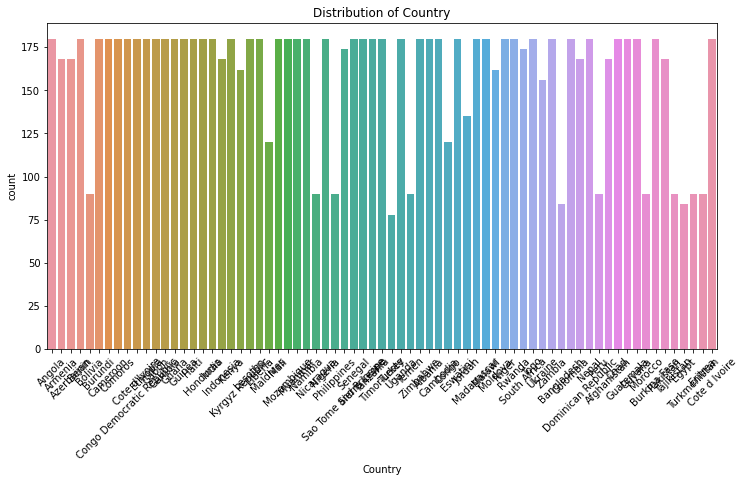

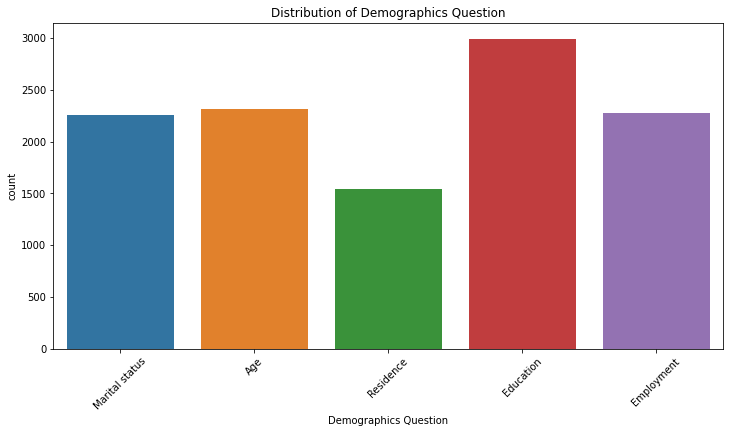

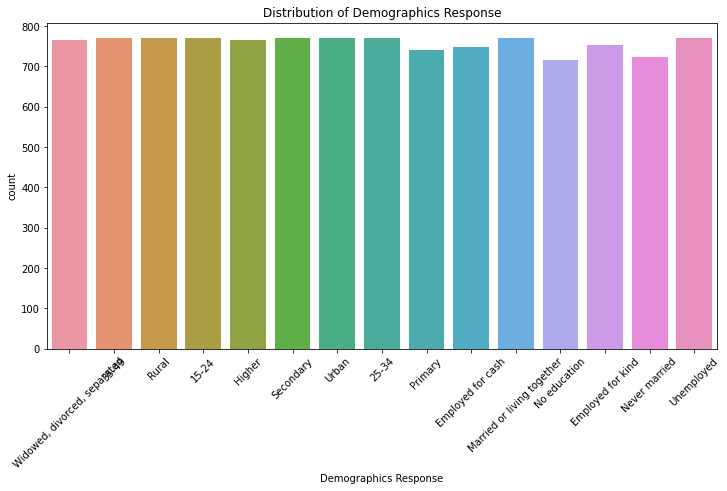

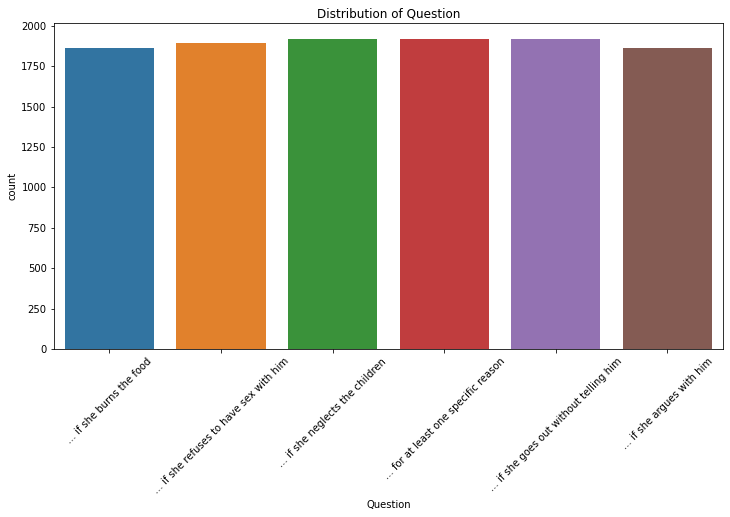

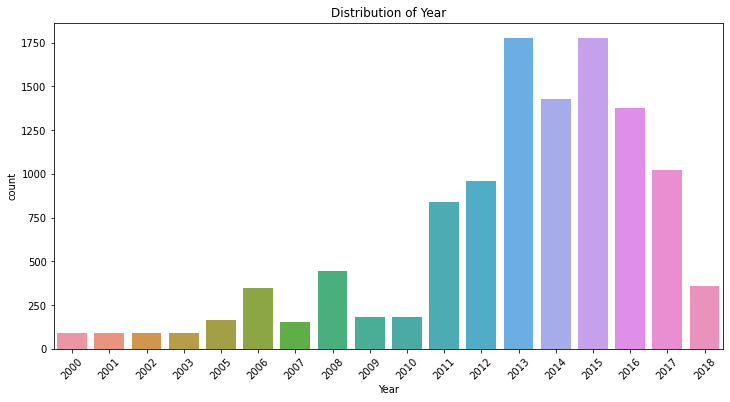

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns


pandas_df = deduped_df.toPandas()


for column in categorical_columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=pandas_df, x=column)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    plt.show()



In [21]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=pandas_df, x='Year', y='Value')
plt.title('Relation between Gender and Value')
plt.show()


NameError: name 'pandas_df' is not defined

<Figure size 864x432 with 0 Axes>

In [29]:
from pyspark.ml.classification import LinearSVC
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import BinaryClassificationEvaluator


In [39]:
svm = LinearSVC(featuresCol='features', labelCol='New label')


In [38]:
# Set parameter grid
paramGrid = ParamGridBuilder()\
    .addGrid(svm.regParam, [0.01, 0.1, 1.0, 10.0]) \
    .addGrid(svm.maxIter, [100, 500])\
    .build()

# Use the CrossValidator to select the best parameters
crossval = CrossValidator(estimator=svm,
                          estimatorParamMaps=paramGrid,
                          evaluator=BinaryClassificationEvaluator(labelCol="New label"),
                          numFolds=5)

cvModel = crossval.fit(train_data)




NameError: name 'train_data' is not defined

In [ ]:
predictions = bestModel.transform(test_data)
evaluator = BinaryClassificationEvaluator(labelCol="New label")
print(f"Area Under ROC: {evaluator.evaluate(predictions)}")


In [40]:
# Splitting the data into training and test sets (70/30)
train_data, test_data = final_df.randomSplit([0.7, 0.3], seed=42)

# Continue with SVM and other code...
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.classification import LinearSVC

# 2. Model Selection - SVM (Support Vector Machine)
svm = LinearSVC(featuresCol='features', labelCol='label')

# 3. Hyperparameter Tuning (Optional)
# Setting up a parameter grid for tuning. For demonstration, I'll tune the regularization parameter.
paramGrid = ParamGridBuilder()\
    .addGrid(svm.regParam, [0.01, 0.1, 1.0])\
    .build()

# 4. Cross Validation
crossval = CrossValidator(estimator=svm,
                          estimatorParamMaps=paramGrid,
                          evaluator=BinaryClassificationEvaluator(),
                          numFolds=5)  # Using 5-fold cross validation

# Train the model
cvModel = crossval.fit(train_data)

# 5. Evaluate the Model on Test Data
predictions = cvModel.transform(test_data)
evaluator = BinaryClassificationEvaluator()
print(f"Area Under ROC: {evaluator.evaluate(predictions)}")


NameError: name 'final_df' is not defined

In [ ]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler
from pyspark.ml.classification import LinearSVC
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Initial data processing
categorical_columns = ['Country', 'Demographics Question', 'Demographics Response', 'Question', 'Year']

# Indexing categorical columns
indexers = [StringIndexer(inputCol=column, outputCol=f"{column}_index").fit(deduped_df) for column in categorical_columns if f"{column}_index" not in deduped_df.columns]

# Encoding categorical columns
encoders = [OneHotEncoder(inputCol=f"{column}_index", outputCol=f"{column}_vec") for column in categorical_columns]

# Assembling features into 'features' column
assembler = VectorAssembler(inputCols=[encoder.getOutputCol() for encoder in encoders] + ['Value'], outputCol="features")

# Pipeline to process the data
pipeline = Pipeline(stages=indexers + encoders + [assembler])

# Transforming the dataset
transformed_df = pipeline.fit(deduped_df).transform(deduped_df)

# Splitting data
train_data, test_data = transformed_df.randomSplit([0.7, 0.3], seed=42)

# SVM Model Implementation
svm = LinearSVC(featuresCol='features', labelCol='label')

# Parameter Grid for Hyperparameter Tuning
paramGrid = ParamGridBuilder().addGrid(svm.regParam, [0.01, 0.1, 1.0]).build()

# Cross-validation
crossval = CrossValidator(estimator=svm, estimatorParamMaps=paramGrid, evaluator=BinaryClassificationEvaluator(), numFolds=5)

# Train the model
cvModel = crossval.fit(train_data)

# Model Evaluation
predictions = cvModel.transform(test_data)
evaluator = BinaryClassificationEvaluator()
print(f"Area Under ROC: {evaluator.evaluate(predictions)}")


In [19]:
#07 - DMA

deduped_df = deduped_df.drop("Gender")



In [20]:
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler
from pyspark.ml import Pipeline

categorical_columns = ['Country', 'Demographics Question', 'Demographics Response', 'Question', 'Year']

indexers = [StringIndexer(inputCol=column, outputCol=f"{column}_index").fit(deduped_df) for column in categorical_columns]

encoders = [OneHotEncoder(inputCol=f"{column}_index", outputCol=f"{column}_vec") for column in categorical_columns]

assembler = VectorAssembler(inputCols=[encoder.getOutputCol() for encoder in encoders] + ['Value'], outputCol="features")

pipeline = Pipeline(stages=indexers + encoders + [assembler])

transformed_df = pipeline.fit(deduped_df).transform(deduped_df)

# Split the data into training and test sets
train_data, test_data = transformed_df.randomSplit([0.7, 0.3], seed=42)


Py4JJavaError: An error occurred while calling o441.fit.
: org.apache.spark.SparkException: Input column Year does not exist.
	at org.apache.spark.ml.feature.StringIndexerBase.$anonfun$validateAndTransformSchema$2(StringIndexer.scala:128)
	at scala.collection.TraversableLike.$anonfun$flatMap$1(TraversableLike.scala:293)
	at scala.collection.IndexedSeqOptimized.foreach(IndexedSeqOptimized.scala:36)
	at scala.collection.IndexedSeqOptimized.foreach$(IndexedSeqOptimized.scala:33)
	at scala.collection.mutable.ArrayOps$ofRef.foreach(ArrayOps.scala:198)
	at scala.collection.TraversableLike.flatMap(TraversableLike.scala:293)
	at scala.collection.TraversableLike.flatMap$(TraversableLike.scala:290)
	at scala.collection.mutable.ArrayOps$ofRef.flatMap(ArrayOps.scala:198)
	at org.apache.spark.ml.feature.StringIndexerBase.validateAndTransformSchema(StringIndexer.scala:123)
	at org.apache.spark.ml.feature.StringIndexerBase.validateAndTransformSchema$(StringIndexer.scala:115)
	at org.apache.spark.ml.feature.StringIndexer.validateAndTransformSchema(StringIndexer.scala:145)
	at org.apache.spark.ml.feature.StringIndexer.transformSchema(StringIndexer.scala:252)
	at org.apache.spark.ml.PipelineStage.transformSchema(Pipeline.scala:71)
	at org.apache.spark.ml.feature.StringIndexer.fit(StringIndexer.scala:237)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:566)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:829)


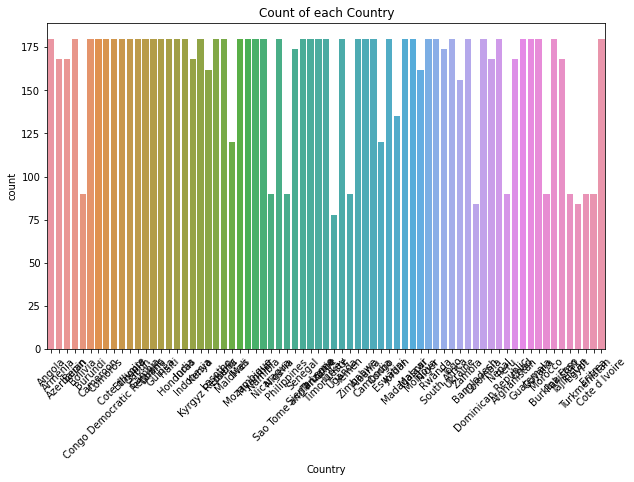

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert Spark DataFrame to Pandas DataFrame
pandas_df = transformed_df.toPandas()

# Example: Bar plot for the count of each 'Country'
plt.figure(figsize=(10, 6))
sns.countplot(data=pandas_df, x='Country')
plt.title('Count of each Country')
plt.xticks(rotation=45)
plt.show()


In [69]:
from pyspark.ml.feature import StandardScaler, StringIndexer
from pyspark.sql.functions import  col

df_selected = df.select('Demographics Response', 'Country', 'Value')


# Processing missing value
median_value = df_selected.approxQuantile('Value', [0.5], 0.01)[0]
df_filled = df_selected.na.fill({'Value': median_value})


# Removes non-numeric columns
df_numeric = df_filled.drop('Demographics Response', 'Country')

# Data standardization
features = df_numeric.columns
assembler = VectorAssembler(inputCols=features, outputCol="features")
df_assembled = assembler.transform(df_numeric)
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures")
scalerModel = scaler.fit(df_assembled)
df_scaled = scalerModel.transform(df_assembled)

# Encode the 'Demographics Response' column
indexer = StringIndexer(inputCol='Demographics Response', outputCol='DemographicsIndexed')
df_encoded = indexer.fit(df_filled).transform(df_filled)


In [70]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

k = 5
kmeans = KMeans().setK(k).setSeed(42).setFeaturesCol("scaledFeatures")
model = kmeans.fit(df_scaled)
predictions = model.transform(df_scaled)


evaluator = ClusteringEvaluator()

silhouette = evaluator.evaluate(predictions)
print(f"Silhouette Score: {silhouette:.2f}")


Silhouette Score: 0.76


In [71]:
from pyspark.sql.functions import col, avg, max, min, count

# Aggregate data within each cluster to find patterns
cluster_patterns = predictions.groupBy("prediction").agg(
    avg("Value").alias("avg_Value"),
    max("Value").alias("max_Value"),
    min("Value").alias("min_Value"),
    count("Value").alias("count")
).sort("prediction")

cluster_patterns.show()

# Descriptive stats for the whole dataset for comparison
overall_stats = df_scaled.agg(
    avg("Value").alias("overall_avg_Value"),
    max("Value").alias("overall_max_Value"),
    min("Value").alias("overall_min_Value")
)

overall_stats.show()


+----------+------------------+---------+---------+-----+
|prediction|         avg_Value|max_Value|min_Value|count|
+----------+------------------+---------+---------+-----+
|         0|4.6922309337134696|      9.9|      0.0| 4209|
|         1| 62.94760273972601|     86.9|     53.6|  584|
|         2| 28.14059546313802|     36.1|     21.7| 2116|
|         3| 44.17433823529417|     53.5|     36.2| 1360|
|         4|15.207180789656476|     21.6|     10.0| 4331|
+----------+------------------+---------+---------+-----+

+------------------+-----------------+-----------------+
| overall_avg_Value|overall_max_Value|overall_min_Value|
+------------------+-----------------+-----------------+
|19.206023809523085|             86.9|              0.0|
+------------------+-----------------+-----------------+



In [65]:
pip install matplotlib seaborn pandas


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


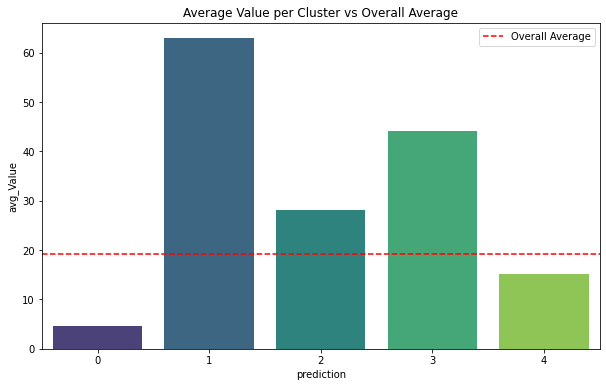

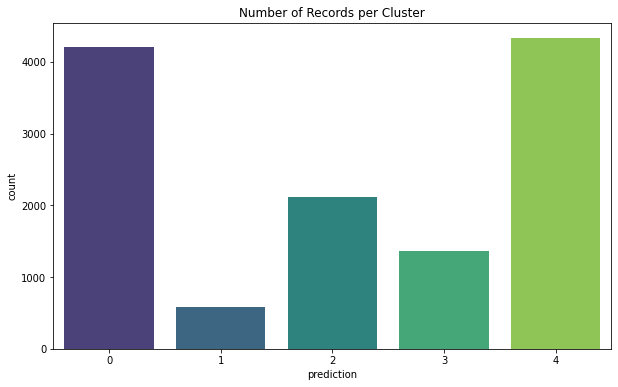

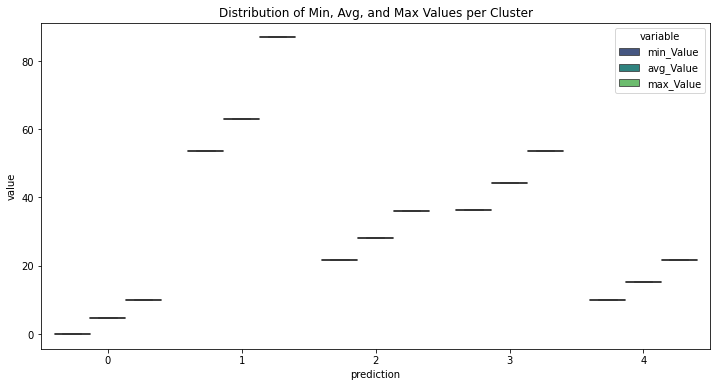

In [76]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert Spark DataFrame to Pandas DataFrame for visualization
cluster_patterns_pd = cluster_patterns.toPandas()
overall_stats_pd = overall_stats.toPandas()

# Plotting average values for each cluster
plt.figure(figsize=(10, 6))
sns.barplot(data=cluster_patterns_pd, x='prediction', y='avg_Value', palette='viridis')
plt.axhline(overall_stats_pd['overall_avg_Value'][0], color='r', linestyle='dashed', label='Overall Average')
plt.title('Average Value per Cluster vs Overall Average')
plt.legend()
plt.show()

# Plotting count of records for each cluster
plt.figure(figsize=(10, 6))
sns.barplot(data=cluster_patterns_pd, x='prediction', y='count', palette='viridis')
plt.title('Number of Records per Cluster')
plt.show()

# Boxplot for min, avg, and max values
cluster_patterns_pd = cluster_patterns_pd.melt(id_vars="prediction", value_vars=["min_Value", "avg_Value", "max_Value"])
plt.figure(figsize=(12, 6))
sns.boxplot(data=cluster_patterns_pd, x='prediction', y='value', hue='variable', palette='viridis')
plt.title('Distribution of Min, Avg, and Max Values per Cluster')
plt.show()


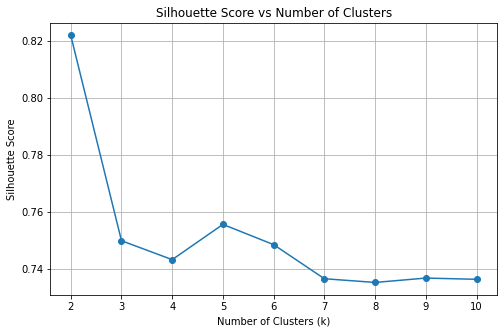

In [75]:
#08 -INT

from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

# set the range of k, I set it to be 2-10
k_values = range(2, 11)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans().setK(k).setSeed(42).setFeaturesCol("scaledFeatures")
    model = kmeans.fit(df_scaled)
    predictions = model.transform(df_scaled)
    
    evaluator = ClusteringEvaluator()
    silhouette = evaluator.evaluate(predictions)
    silhouette_scores.append(silhouette)

# Visulize the scores of Silhouette
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Score vs Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()
